In [1]:
%cd C:\Users\SZU\Desktop\udacity\project 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

B = pd.read_csv("results.csv")
B

C:\Users\SZU\Desktop\udacity\project 1


,year,city,avg_temp
0,1743,Boston,1.19
1,1744,Boston,9.63
2,1745,Boston,-1.37
3,1746,Boston,NaN
4,1747,Boston,NaN
...,...,...,...
266,2009,Boston,8.07
267,2010,Boston,9.58
268,2011,Boston,9.12
269,2012,Boston,10.06


In [2]:
B['avg_temp'].isna().sum()

5

There is 5 missing data in temp, which will affect the result.

In [3]:
B[B.isnull().values==True]

,year,city,avg_temp
3,1746,Boston,NaN
4,1747,Boston,NaN
5,1748,Boston,NaN
6,1749,Boston,NaN
37,1780,Boston,NaN


Found the year that temp are missing.

In [4]:
G = pd.read_csv("results_G.csv")
G

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [5]:
G['avg_temp'].isna().sum()

0

Global doesn't contain any NA. It's noticeable that the year start from 1750 which is different from Boston.
For the comparison, cut off the year before 1750 in Boston data. 

In [6]:
B = B.set_index('year')
B2 = B.loc['1750':'2013']
B2

,city,avg_temp
year,,
1750,Boston,7.88
1751,Boston,8.60
1752,Boston,0.36
1753,Boston,7.35
1754,Boston,7.75
...,...,...
2009,Boston,8.07
2010,Boston,9.58
2011,Boston,9.12


In [7]:
B.loc['1779':'1781']

,city,avg_temp
year,,
1779,Boston,-2.31
1780,Boston,NaN
1781,Boston,7.61


Replace NA with average temp between year 1780

In [8]:
mean = (7.61-2.31)/2
B2['avg_temp'] = B2['avg_temp'].fillna(mean)

C:\Users\SZU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
B2.loc['1779':'1781']

,city,avg_temp
year,,
1779,Boston,-2.31
1780,Boston,2.65
1781,Boston,7.61


In [10]:
G = G.set_index('year')
G

,avg_temp
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47
...,...
2011,9.52
2012,9.51
2013,9.61


In [11]:
rolling_mean_G = G.avg_temp.rolling(window=5).mean()
rolling_mean_B = B2.avg_temp.rolling(window=5).mean()

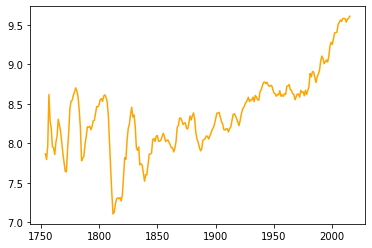

In [12]:
plt.plot(rolling_mean_G, label= '5 Years Simple Moving Averages',color='orange');

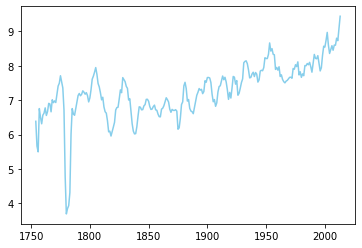

In [13]:
plt.plot(rolling_mean_B, label= '5 Years Simple Moving Averages',color='Skyblue');

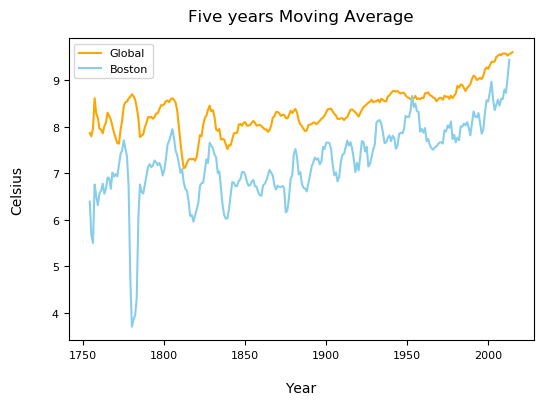

In [14]:
plt.figure(dpi=100,linewidth = 2)
plt.plot(rolling_mean_G,color='orange',label="Global");
plt.plot(rolling_mean_B,color='Skyblue',label = "Boston");

plt.title("Five years Moving Average", x=0.5, y=1.03)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Year", fontsize=10, labelpad = 15)
plt.ylabel("Celsius", fontsize=10, labelpad = 20)
plt.legend(loc = "best", fontsize=8)

plt.show()

In [15]:
rolling_mean_G10 = G.avg_temp.rolling(window=10).mean()
rolling_mean_B10 = B.avg_temp.rolling(window=10).mean()

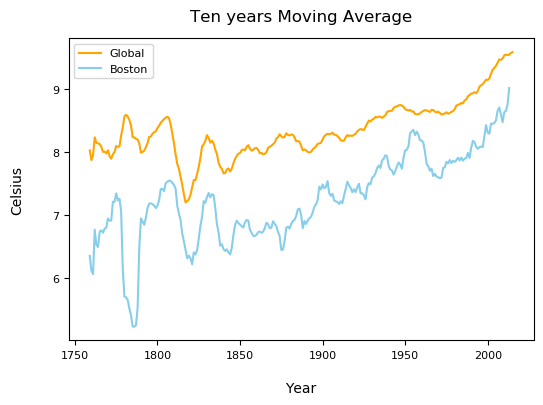

In [16]:
plt.figure(dpi=100,linewidth = 2)
plt.plot(rolling_mean_G10,color='orange',label="Global");
plt.plot(rolling_mean_B10,color='Skyblue',label = "Boston");

plt.title("Ten years Moving Average", x=0.5, y=1.03)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Year", fontsize=10, labelpad = 15)
plt.ylabel("Celsius", fontsize=10, labelpad = 20)
plt.legend(loc = "best", fontsize=8)

plt.show()

In [17]:
rolling_mean_G20 = G.avg_temp.rolling(window=15).mean()
rolling_mean_B20 = B.avg_temp.rolling(window=15).mean()

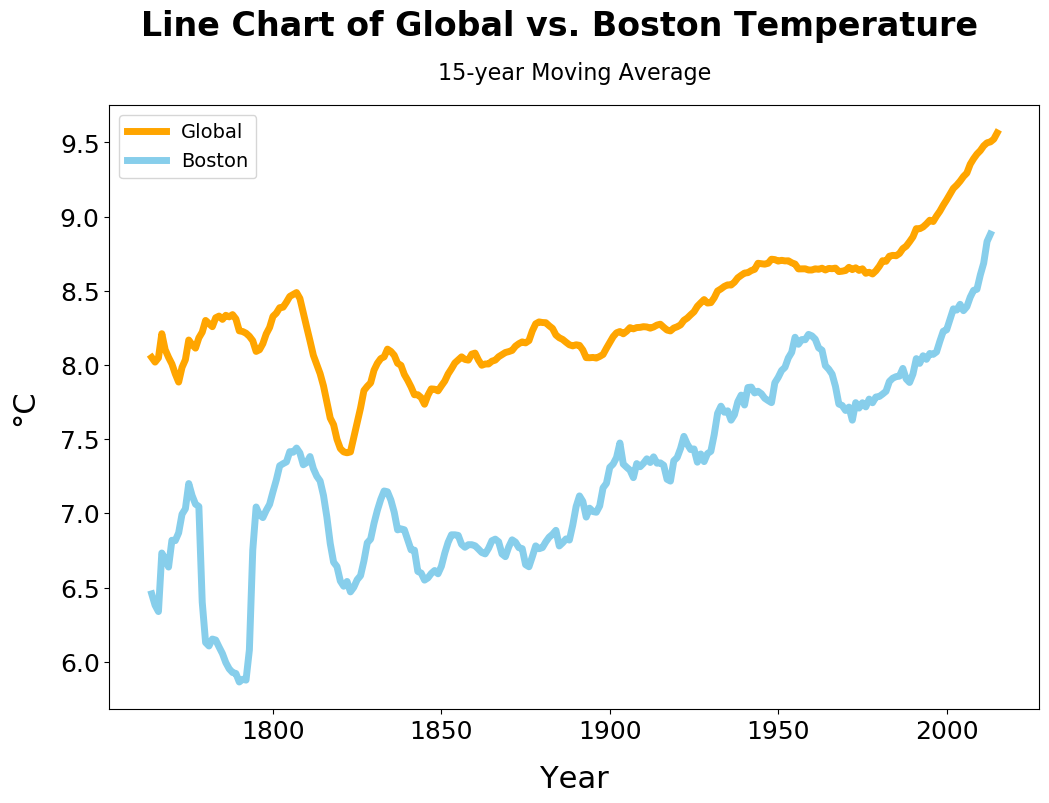

In [27]:
plt.figure(figsize=(12,8),dpi=100)
plt.plot(rolling_mean_G20,color='orange',label="Global",linewidth = 5);
plt.plot(rolling_mean_B20,color='Skyblue',label = "Boston",linewidth = 5);

plt.suptitle("Line Chart of Global vs. Boston Temperature", x=0.5, y=1,fontweight='bold',fontsize=24)
plt.title("15-year Moving Average",y=1.03,fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Year", fontsize=22, labelpad = 15)
plt.ylabel("°C", fontsize=22, labelpad = 15)
plt.legend(loc = "best", fontsize=14)

plt.savefig('15-year Moving Average.png')
plt.show()